95.5  percent of data lies within 2 devitations from the mean


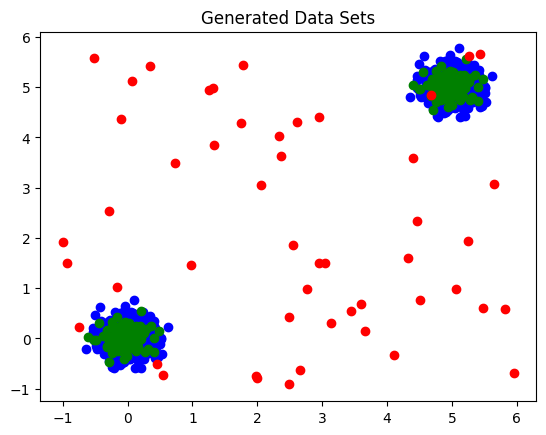

Accuracy with Test Data:  0.885
Accuracy In Outlier Detection:  0.98


In [4]:
# importing libaries ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig
from sklearn.ensemble import IsolationForest

# Instantiating container for Mersenne Twister pseudo-random number generator with a seed of int 42
rng = np.random.RandomState(42)

# Generating 2 clusters of data using "Standard Normal" distribution
# In Standard Normal distribution 95% of data lies within +-2
# Multiplying by 0.2 leaves 95% within +-0.4
X_train = 0.2 * rng.randn(1000, 2)
print((abs(X_train[:, 0]) <= 0.4).sum() / len(X_train[:, 0]) * 100,
      " percent of data lies within 2 devitations from the mean")
# Generating second cluster of data (5,5) points away from the center of the first cluster in both axes
X_train = np.r_[X_train + 5, X_train]

# Generating the Dest Data using the same distribution of the training data
X_test = 0.2 * rng.randn(100, 2)
# Second cluster of the Test Data as well
X_test = np.r_[X_test + 5, X_test]

# Generating outliers spread throughout the plot using uniform distribution
X_outlier = rng.uniform(low=-1, high=6, size=(50, 2))

# Visualizing the generated data sets: Training - blue, Test - green, Outliers - red
plt.title("Generated Data Sets")
plt.scatter(X_train[:, 0], X_train[:, 1], c='blue')
plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
plt.scatter(X_outlier[:, 0], X_outlier[:, 1], c='red')
plt.show()

# Fitting the Isolation Forest Estimator with Training Data
# Contamination factors indicates the percentage of data we believe to be outliers
clf = IsolationForest(max_samples=100, random_state=rng, contamination=0.1)
clf.fit(X_train)

# Running predictions on the Test and Outliers Data Sets using the estimator
pred_test = clf.predict(X_test)
pred_outlier = clf.predict(X_outlier)

print("Accuracy with Test Data: ", (pred_test == 1).sum() / len(pred_test))
print("Accuracy In Outlier Detection: ", (pred_outlier == -1).sum() / len(pred_outlier))

